In [1]:
# 基本套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 資料前處理
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Tensorflow 套件
from tensorflow import keras
from tensorflow.keras import backend as clear
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

# 評估指標
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# 1. 資料前處理

In [6]:
# 1.1 load data
df = pd.read_csv(r"..\Titanic_demo_1.csv")
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,no
1,1,female,38.0,1,0,71.2833,C,yes
2,3,female,26.0,0,0,7.9250,S,yes
3,1,female,35.0,1,0,53.1000,S,yes
4,3,male,35.0,0,0,8.0500,S,no
...,...,...,...,...,...,...,...,...
1304,3,male,NaN,0,0,8.0500,S,yes
1305,1,female,39.0,0,0,108.9000,C,no
1306,3,male,NaN,0,0,7.2500,S,no
1307,3,male,NaN,0,0,8.0500,S,no


In [7]:
# 1.2 Change data type
df[['Pclass']]=df[['Pclass']].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   object 
 1   Sex       1309 non-null   object 
 2   Age       1001 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1308 non-null   float64
 6   Embarked  1309 non-null   object 
 7   Survived  1309 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 81.9+ KB


In [8]:
# 1.3 Deal with missing value by dropping it
new_df=df.dropna(axis=0, how='any')
new_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,no
1,1,female,38.0,1,0,71.2833,C,yes
2,3,female,26.0,0,0,7.9250,S,yes
3,1,female,35.0,1,0,53.1000,S,yes
4,3,male,35.0,0,0,8.0500,S,no
...,...,...,...,...,...,...,...,...
1298,1,male,50.0,1,1,211.5000,C,yes
1300,3,female,3.0,1,1,13.7750,S,yes
1302,1,female,37.0,1,0,90.0000,Q,yes
1303,3,female,28.0,0,0,7.7750,S,no


In [9]:
# 1.4 Using pd.get_dummies function to do one-hot encoding
dummied_new_df=pd.get_dummies(new_df,columns=['Pclass','Sex','Embarked','Survived'])
dummied_new_df

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_no,Survived_yes
0,22.0,1,0,7.2500,False,False,True,False,True,False,False,True,True,False
1,38.0,1,0,71.2833,True,False,False,True,False,True,False,False,False,True
2,26.0,0,0,7.9250,False,False,True,True,False,False,False,True,False,True
3,35.0,1,0,53.1000,True,False,False,True,False,False,False,True,False,True
4,35.0,0,0,8.0500,False,False,True,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,50.0,1,1,211.5000,True,False,False,False,True,True,False,False,False,True
1300,3.0,1,1,13.7750,False,False,True,True,False,False,False,True,False,True
1302,37.0,1,0,90.0000,True,False,False,True,False,False,True,False,False,True
1303,28.0,0,0,7.7750,False,False,True,True,False,False,False,True,True,False


In [10]:
# 1.5 Export to CSV file
dummied_new_df.to_csv("Titanic_ANN_Demo_deleteNA.csv", index=False, header=True)
print('Export complete...')

Export complete...


# 2. 資料正規化

In [11]:
# 2.1 minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scaling=MMscaler.fit_transform(dummied_new_df)
scaled_data=pd.DataFrame(data=scaling)
scaled_data.columns=['Age','SibsSp','Parch','Fare','Pclass_1','Pclass_2','Pclass_3','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Survived_no','Survived_yes']
scaled_data.head()

,Age,SibsSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_no,Survived_yes
0,0.265823,0.2,0.0,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.468354,0.2,0.0,0.139136,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.316456,0.0,0.0,0.015469,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.430380,0.2,0.0,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.430380,0.0,0.0,0.015713,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


# 3. 設定目標變數(Y)和自變數(X)

In [12]:
# 3.1.1 set x (make prediction) with minimax
x=scaled_data.drop(['Survived_no','Survived_yes'],axis=1).copy()

# 3.1.2 set y (want to predict)
y=scaled_data['Survived_yes'].copy()
y=y.astype(int)

In [13]:
# 3.2 Split the data (split into 80% training data & 20% testing data) (lock seed)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

# 4. 建立神經網路

In [ ]:
# 4.1 使用 shape 函數來取得資料集的特徵數量  
input_features=x.shape[1]
print('Amount of features:',input_features)

Amount of features: 12


## 4.2 設計神經網路架構(第一種寫法)

In [15]:
clear.clear_session()  #  (非常重要) 初始化神經網路

# Create input layer
inputs = keras.Input(shape=(12,))
# Create first hidden layer  
hidden_layer_1 = Dense(units=24, activation='relu')(inputs)
# Create second hidden layer
hidden_layer_2 = Dense(units=48, activation='relu')(hidden_layer_1)
# Create output layer
outputs = Dense(units=1, activation='sigmoid')(hidden_layer_2)

classic_style_ANN = keras.Model(inputs=inputs, outputs=outputs, name='classic_style')
opt=Adam(learning_rate=0.001)   # 優化器(optimizer)須設定 learning_rate
classic_style_ANN.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
classic_style_ANN.summary()

Model: "classic_style"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 48)             │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            49 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,561 (6.10 KB)

 Trainable params: 1,561 (6.10 KB)

 Non-trainable params: 0 (0.00 B)

## 4.2 設計神經網路架構(第二種寫法)

In [16]:
# Create the model
clear.clear_session()
model=Sequential()

# Add input layer & first hidden layer
model.add(Dense(units=24, input_dim=12, activation='relu'))

# Add second hidden layer
model.add(Dense(units=48, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the defined Net
opt=Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Finally check the model 
model.summary()

c:\Users\User\anaconda3\envs\MLenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 24)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 48)             │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            49 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,561 (6.10 KB)

 Trainable params: 1,561 (6.10 KB)

 Non-trainable params: 0 (0.00 B)

# 5. 訓練模型

In [17]:
# 5.1 Store in the history for more useful information
history=model.fit(x_train, y_train, epochs=100, batch_size=64,verbose=1,validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5768 - loss: 0.6838 - val_accuracy: 0.6062 - val_loss: 0.6621
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6369 - loss: 0.6525 - val_accuracy: 0.6438 - val_loss: 0.6343
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6731 - loss: 0.6341 - val_accuracy: 0.6875 - val_loss: 0.6120
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7074 - loss: 0.6080 - val_accuracy: 0.6938 - val_loss: 0.5921
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7204 - loss: 0.5912 - val_accuracy: 0.7563 - val_loss: 0.5758
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7389 - loss: 0.5848 - val_accuracy: 0.7437 - val_loss: 0.5634
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7631 - loss: 0.5530 - val_accuracy: 0.7500 - val_loss: 0.5531
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7649 - loss: 0.5498 - val_accuracy: 0.7

In [18]:
# 5.2 Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

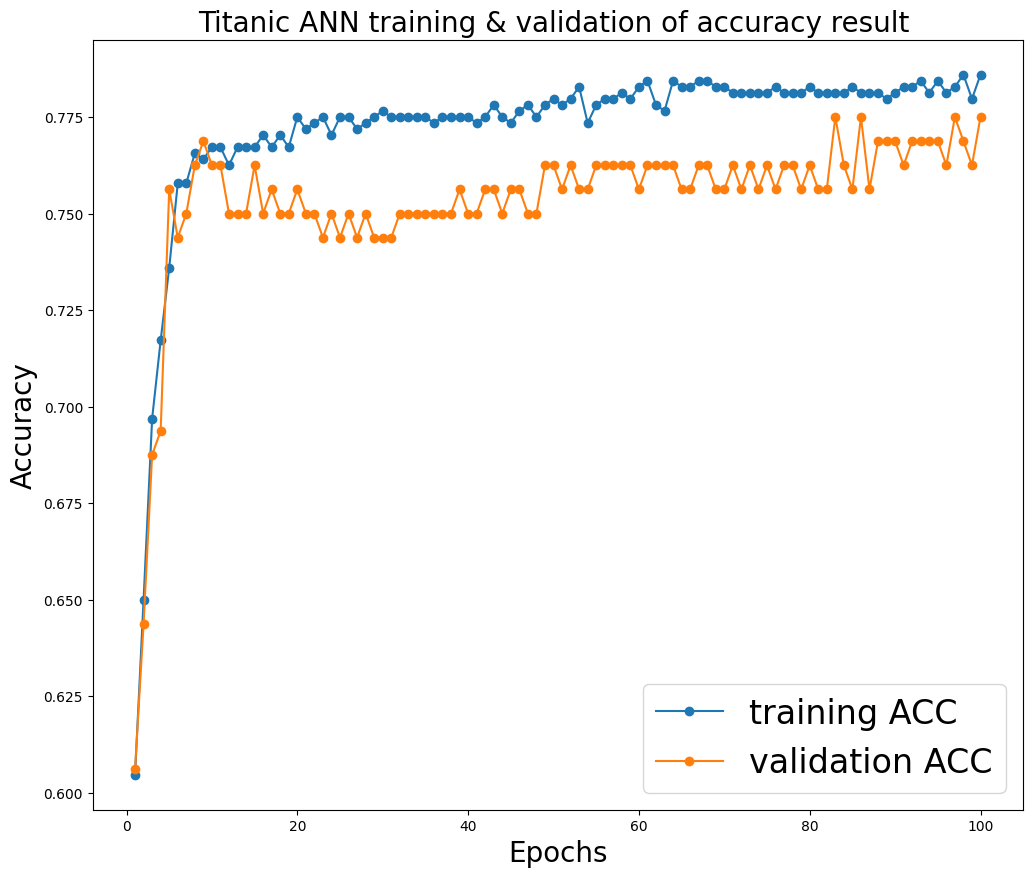

In [19]:
# 5.3 Plot the history of training and validation
training_acc_values=modeling_result['accuracy']
val_acc_values=modeling_result['val_accuracy']
epochs=range(1,len(training_acc_values)+1)

plt.figure(figsize=(12,10))
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.title('Titanic ANN training & validation of accuracy result ',fontsize=20)

plt.plot(epochs, training_acc_values,marker='o',label='training ACC')
plt.plot(epochs, val_acc_values,marker='o',label='validation ACC')
plt.legend(loc=4,fontsize=24)
plt.show()

In [20]:
# 5.4 Save the trained model
model.save('titanic_ANN_trained_model.h5')   #  必須 .h5 副檔名
print('Model has been saved...')

Model has been saved...


In [21]:
# 5.5 Restore the saved model for testing
ANN_model=keras.models.load_model('Titanic_ANN_trained_model.h5')
print('Model successfully loaded...')

Model successfully loaded...


# 6. 測試模型好壞

In [22]:
# 6.1 Make prediction 
prediction=ANN_model.predict_on_batch(x_test)
prediction

array([[0.30324152],
       [0.16690801],
       [0.14118907],
       [0.14028345],
       [0.3073019 ],
       [0.33219057],
       [0.506212  ],
       [0.6107241 ],
       [0.15437122],
       [0.20239897],
       [0.58882314],
       [0.8179971 ],
       [0.15461071],
       [0.8321871 ],
       [0.40140387],
       [0.85324174],
       [0.09379109],
       [0.48649493],
       [0.11541275],
       [0.32401156],
       [0.09406309],
       [0.77330536],
       [0.7655416 ],
       [0.23242055],
       [0.1477849 ],
       [0.80630535],
       [0.8576307 ],
       [0.7308271 ],
       [0.16690798],
       [0.8088716 ],
       [0.2980905 ],
       [0.1500168 ],
       [0.7768102 ],
       [0.1065437 ],
       [0.7903262 ],
       [0.8612071 ],
       [0.19247867],
       [0.78493834],
       [0.8198113 ],
       [0.7829543 ],
       [0.85818195],
       [0.19908795],
       [0.73630583],
       [0.8480961 ],
       [0.1641951 ],
       [0.18370892],
       [0.11989596],
       [0.192

In [23]:
# 6.2 Transform the predictions to 0 and 1 
testing_prediction=(ANN_model.predict_on_batch(x_test) > 0.5).astype('int')
testing_prediction

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [24]:
# 6.3 Calculating the mertics
testing_acc=accuracy_score(y_test,testing_prediction)
testing_f1s=f1_score(y_test,testing_prediction,pos_label=1)
testing_pre=precision_score(y_test,testing_prediction,pos_label=1)
testing_sen=sensitivity_score(y_test,testing_prediction,pos_label=1)
testing_spe=specificity_score(y_test,testing_prediction,pos_label=1)
testing_cm=confusion_matrix(y_test,testing_prediction)
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

Testing result:
Testing ACC: 74.13
Testing f1s: 64.86
Testing pre: 69.57
Testing sen: 60.76
Testing spe: 82.79

Testing confusion matrix:
[[101  21]
 [ 31  48]]


In [25]:
# Tip: Quick testing with the metrics set for the model by using evaluate function
ANN_model.evaluate(x_test,y_test,batch_size=32,verbose=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7122 - loss: 0.5870  


[0.5387563705444336, 0.7412935495376587]